In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns

df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [78]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [84]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [86]:
df.isnull().sum().sum()

0

In [88]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [90]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [92]:
df.duplicated().sum()

0

In [94]:
df["customerID"].duplicated().sum()

0

In [96]:
def conv(value): 
    if value == 1:
        return "Yes"
    else:
        return "No"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

#converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [99]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [101]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

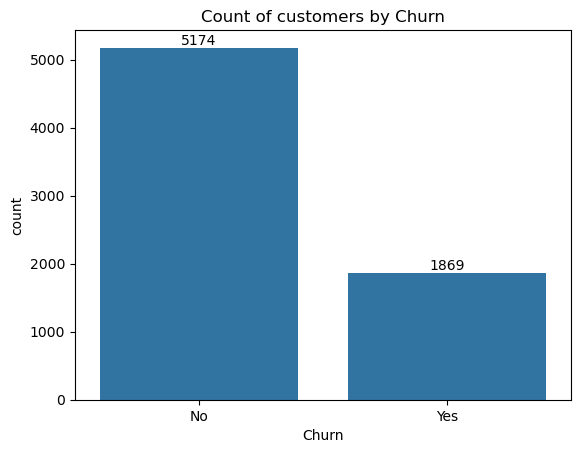

In [103]:
ax = sns.countplot(x = 'Churn' , data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of customers by Churn")
plt.show()

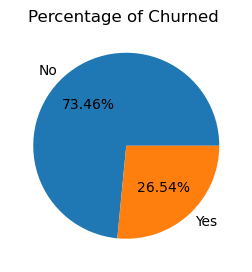

In [105]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.title("Percentage of Churned ")
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.show()

In [107]:
gb

,Churn
Churn,
No,5174
Yes,1869


#from the given pie chart we can conclude that 26.54% of our customers are churned out
#now lets explore the reason behind it

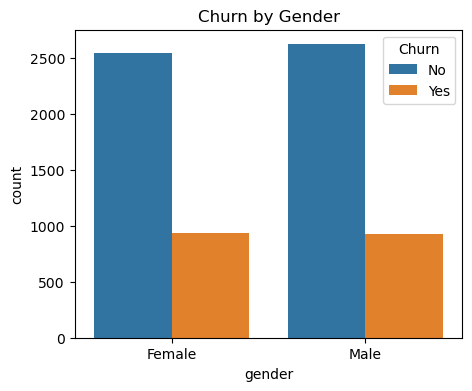

In [110]:
plt.figure(figsize = (5,4))
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title("Churn by Gender")
plt.show()

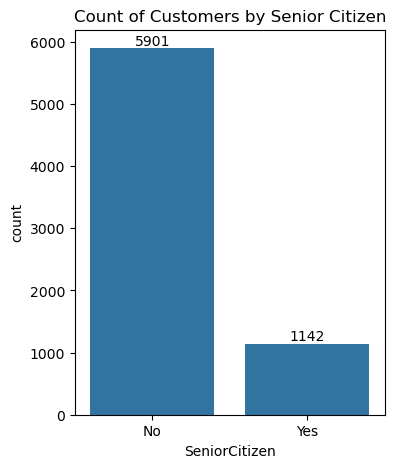

In [112]:
plt.figure(figsize = (4,5))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizen")
plt.show()

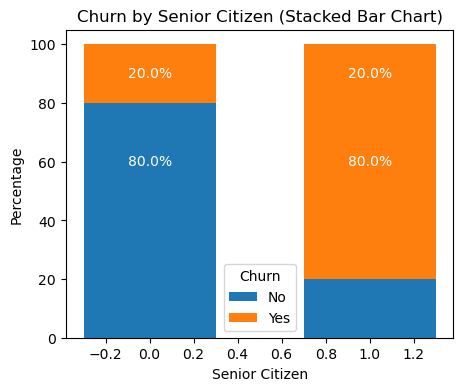

In [114]:

# Sample DataFrame
data = {
    'SeniorCitizen': [0, 1, 0, 1, 0, 1, 1, 0, 0, 1],
    'Churn': ['Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes']
}
df = pd.DataFrame(data)

# Count the occurrences
count_data = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='count')

# Calculate the total count for each SeniorCitizen group
total_counts = count_data.groupby('SeniorCitizen')['count'].sum().reset_index(name='total_count')

# Merge to calculate percentages
count_data = pd.merge(count_data, total_counts, on='SeniorCitizen')
count_data['percentage'] = count_data['count'] / count_data['total_count'] * 100

# Pivot table to get the right format for plotting
pivot_data = count_data.pivot(index='SeniorCitizen', columns='Churn', values='percentage')

# Plot
fig, ax = plt.subplots(figsize=(5, 4))

# Plot stacked bar chart
bar_width = 0.6
bottom_values = [0] * pivot_data.shape[0]
for col in pivot_data.columns:
    ax.bar(pivot_data.index, pivot_data[col], bottom=bottom_values, label=col, width=bar_width)
    bottom_values = [i + j for i, j in zip(bottom_values, pivot_data[col])]

# Adding the labels
for i in range(pivot_data.shape[0]):
    for j, col in enumerate(pivot_data.columns):
        percentage = pivot_data.iloc[i][col]
        if percentage > 0:
            ax.text(i, bottom_values[i] - pivot_data.iloc[i][col]/2, f'{percentage:.1f}%', ha='center', va='center', color='white')

ax.set_title('Churn by Senior Citizen (Stacked Bar Chart)')
ax.set_ylabel('Percentage')
ax.set_xlabel('Senior Citizen')
ax.legend(title ='Churn')

plt.show()


#comparative a greater percentage of perople in senior citizen category has churned.

In [128]:
# Print the first few rows of the DataFrame
print(df.head())

# Print all column names in the DataFrame
print(df.columns)


   SeniorCitizen Churn
0              0   Yes
1              1    No
2              0    No
3              1   Yes
4              0    No
Index(['SeniorCitizen', 'Churn'], dtype='object')


In [132]:


# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Print all column names again
print(df.columns)




Index(['SeniorCitizen', 'Churn'], dtype='object')


In [136]:
# Example of loading data from a CSV file
df = pd.read_csv('Customer Churn.csv')

# Print the first few rows to verify
print(df.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [138]:
# Check if 'Contract' is in the DataFrame
print('Contract' in df.columns)


True


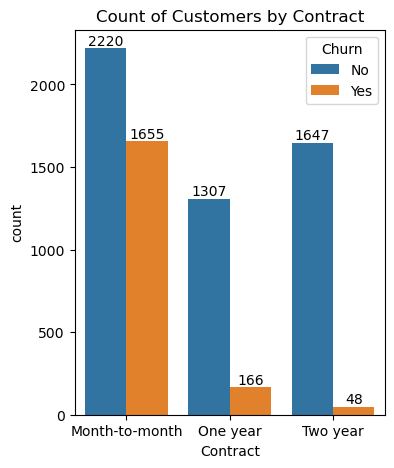

In [140]:

plt.figure(figsize=(4, 5))
ax = sns.countplot(x="Contract", data=df, hue="Churn")

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)

plt.title("Count of Customers by Contract")
plt.show()


#here we conclude that the people who take month to month contract are leaving the services so we need to convince them by telling the benefits of 1 yr or 2 yr contract to maintain the customer duration

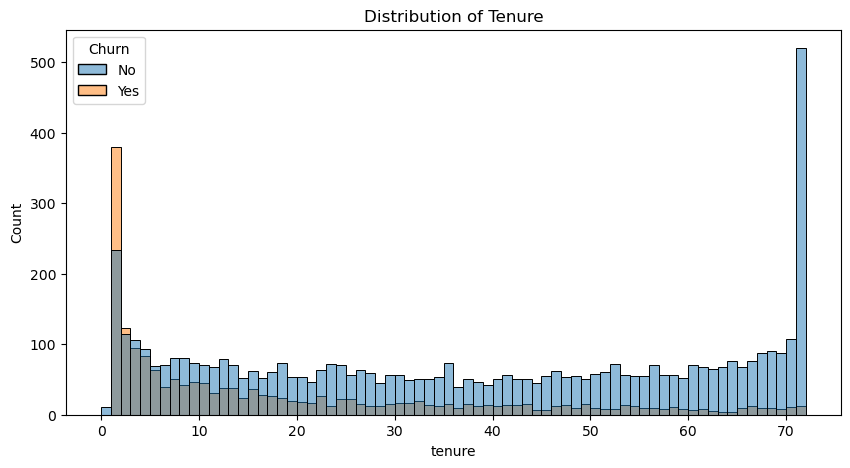

In [152]:

plt.figure(figsize=(10, 5)) 
sns.histplot(data=df, x="tenure", bins = 72, hue = "Churn")
plt.title("Distribution of Tenure")
plt.show()


In [198]:
# Print the first few rows of the DataFrame
print(df.head())

# Print all column names in the DataFrame
print(df.columns)

  PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup  \
0          Yes            No             DSL             No          Yes   
1           No           Yes     Fiber optic            Yes           No   
2          Yes            No             DSL             No           No   
3          Yes            No             DSL            Yes          Yes   
4           No           Yes     Fiber optic             No          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies  
0               No          No          No             Yes  
1              Yes         Yes         Yes              No  
2              Yes          No          No             Yes  
3               No          No         Yes             Yes  
4               No         Yes          No              No  
Index(['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies'],


In [200]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Print all column names again
print(df.columns)

Index(['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies'],
      dtype='object')


In [202]:
# Example of loading data from a CSV file
df = pd.read_csv('Customer Churn.csv')

# Print the first few rows to verify
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [204]:
print('PaymentMethod' in df.columns)

True


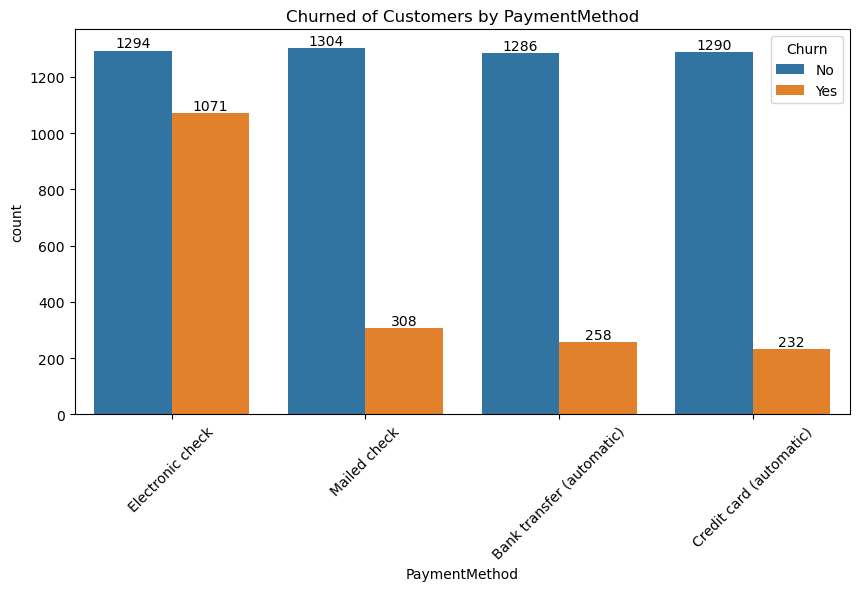

In [208]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned of Customers by PaymentMethod")
plt.xticks(rotation = 45)
plt.show()

#customer is likely to churn when he is using electronics check as a payment method

In [154]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

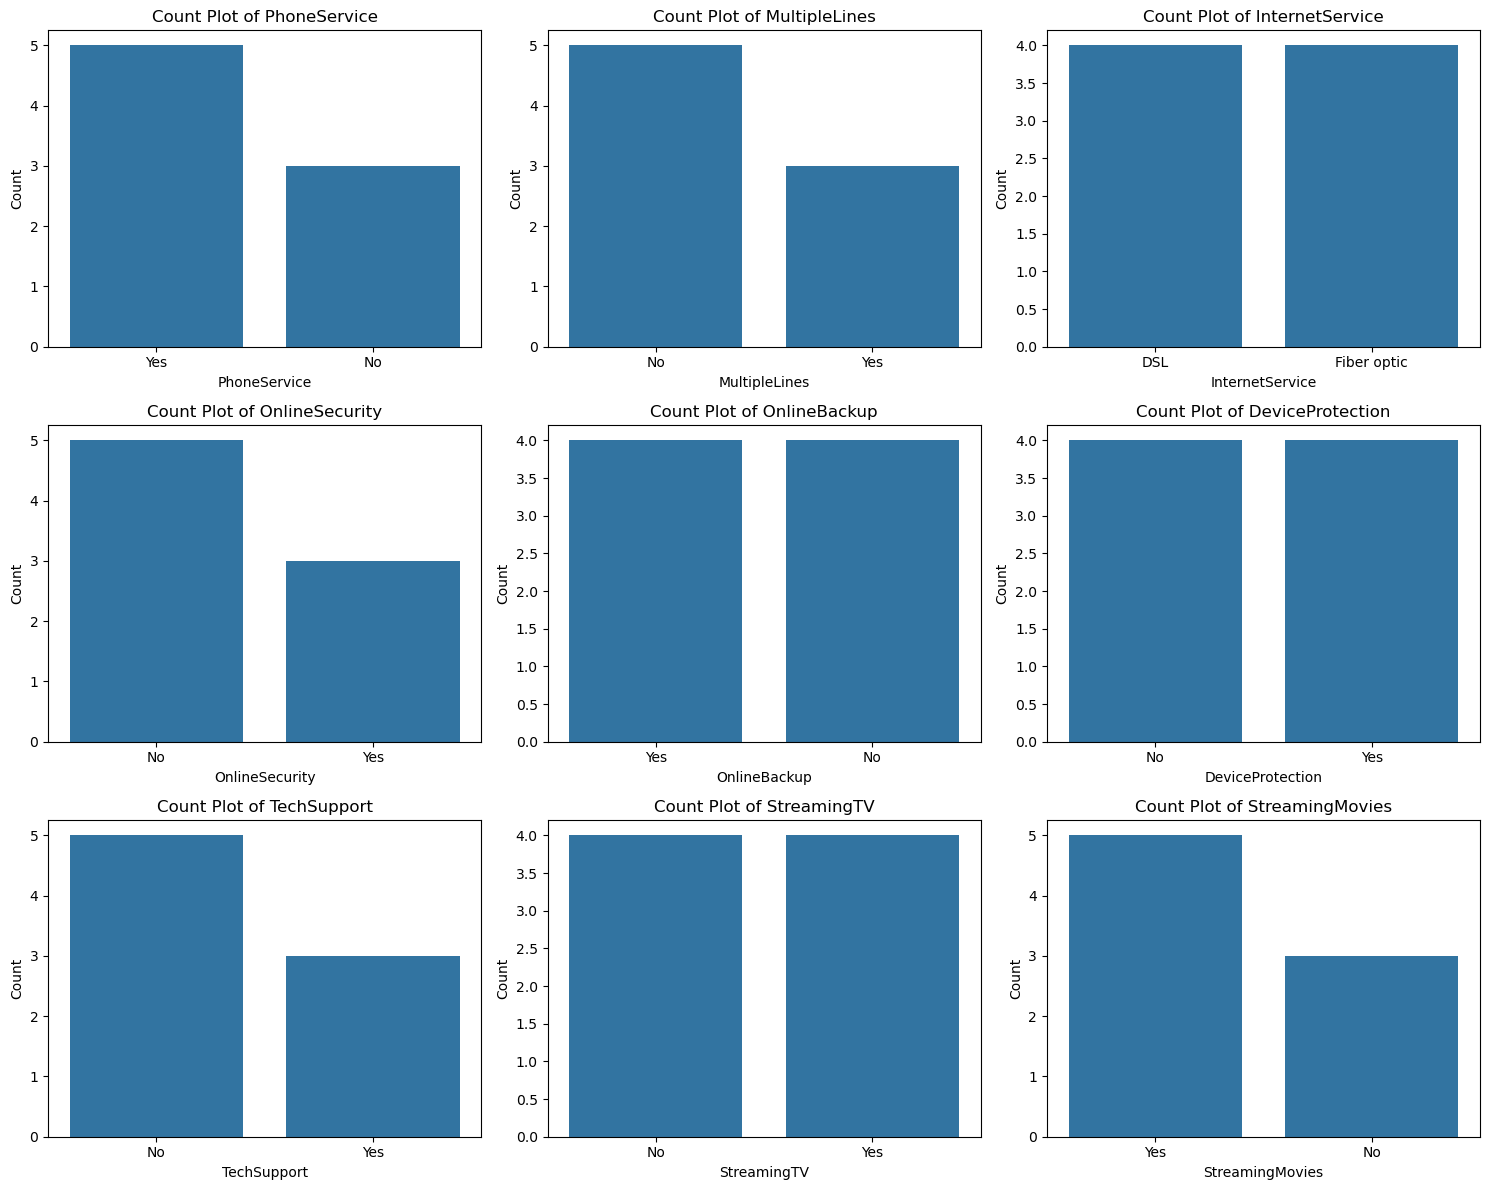

In [178]:
# List of columns to plot
columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Number of columns and rows for the subplots
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

# Plot each column with specified colors
colors = ['yellow', 'red']

for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
